In [25]:
## Import packages needed for this script 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# load arrays
path='/Users/aazeez/Documents/Personal/erdosbootcamp/Project'

epochs_array = np.load(path+'/data_array.npy') 
epochs_label= np.load(path+'/label_array.npy')
group_array= np.load(path+'/group_array.npy')

epochs_array.shape, epochs_label.shape, group_array.shape

((600, 65, 256), (600,), (600,))

In [3]:
epochs_array=np.moveaxis(epochs_array,1,2)
epochs_array.shape

(600, 256, 65)

In [4]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D,\
GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

def cnnmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5, kernel_size=3, strides=1, input_shape=(256,65))) ###1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2)) ##2
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) #3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2, strides=2)) ##4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) #5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2)) ##6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) ##7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2, strides=2)) ##8
    model.add(Conv1D(filters=5, kernel_size=3, strides=1)) ##9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D()) #10
    model.add(Dense(1, activation='sigmoid')) #11
    
    model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [5]:
model = cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 254, 5)            980       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 5)            20        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 254, 5)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 127, 5)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 125, 5)            80        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 125, 5)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 5)             0

In [6]:
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()

In [138]:
accuracy=[]#np.array((5,len(range(1,100))))#[]
e=10
b=10
# for b in np.linspace(1, 10, num=10):
#     for e in np.linspace(1, 10, num=10):
for train_index, val_index in gkf.split(epochs_array, epochs_label, groups=group_array):
    train_features, train_labels = epochs_array[train_index], epochs_label[train_index]
    val_features, val_labels = epochs_array[val_index], epochs_label[val_index]

    scaler=StandardScaler()
    train_features=scaler.fit_transform(train_features.reshape(-1,\
                    train_features.shape[-1])).reshape(train_features.shape)
    val_features=scaler.transform(val_features.reshape(-1,\
                    val_features.shape[-1])).reshape(val_features.shape)

    model=cnnmodel()
    history=model.fit(train_features, train_labels, epochs=int(e), batch_size=int(b), validation_data=(val_features, val_labels))
    accuracy.append(model.evaluate(val_features, val_labels)[1])
    print()
    print('Accuracy:',b, e, np.mean(accuracy))



Epoch 1/10
48/48 [==============================] - 1s 13ms/step - loss: 0.7001 - accuracy: 0.5483 - val_loss: 0.7983 - val_accuracy: 0.4167
Epoch 2/10
48/48 [==============================] - 0s 7ms/step - loss: 0.6020 - accuracy: 0.7164 - val_loss: 0.7353 - val_accuracy: 0.4417
Epoch 3/10
48/48 [==============================] - 0s 7ms/step - loss: 0.4430 - accuracy: 0.8433 - val_loss: 0.9011 - val_accuracy: 0.4000
Epoch 4/10
48/48 [==============================] - 0s 6ms/step - loss: 0.2970 - accuracy: 0.8633 - val_loss: 0.9437 - val_accuracy: 0.3667
Epoch 5/10
48/48 [==============================] - 0s 6ms/step - loss: 0.1881 - accuracy: 0.9208 - val_loss: 1.0044 - val_accuracy: 0.4250
Epoch 6/10
48/48 [==============================] - 0s 6ms/step - loss: 0.2038 - accuracy: 0.9218 - val_loss: 1.0670 - val_accuracy: 0.4417
Epoch 7/10
48/48 [==============================] - 0s 7ms/step - loss: 0.1427 - accuracy: 0.9556 - val_loss: 1.3630 - val_accuracy: 0.4000
Epoch 8/10
48/48 [=

In [139]:
accuracy

[0.5166666507720947,
 0.3499999940395355,
 0.6916666626930237,
 0.6000000238418579,
 0.8583333492279053]

In [140]:
np.mean(accuracy)
# 10:0.6050000071525574
#15:0.5699999988079071
#e=3 b=10 0.698333328962326
#e=2 b=4 0.673333328962326
#e=3 b=4 0.6866666674613953
# e=2b=6 0.7183333456516265


0.6033333361148834

In [68]:
# 40=71
# 30=69
# 35=61

In [141]:
history_dict = history.history
# history_dict

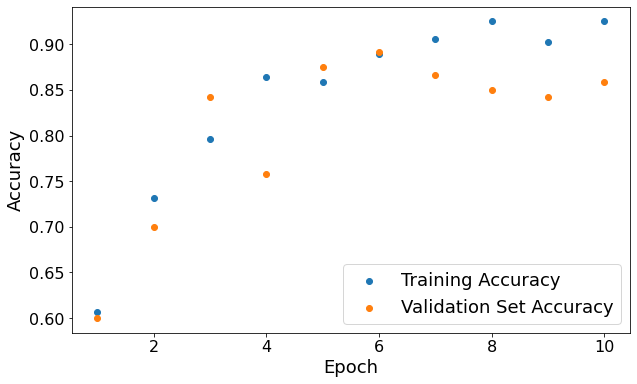

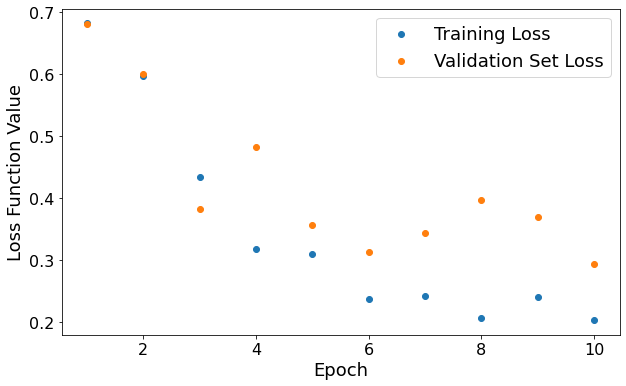

In [142]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,e+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,e+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (10,6))

plt.scatter(range(1,e+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,e+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [129]:
for e in np.linspace(1, 10, num=10):
    print('Accuracy:',int(e), 8)

Accuracy: 1 8
Accuracy: 2 8
Accuracy: 3 8
Accuracy: 4 8
Accuracy: 5 8
Accuracy: 6 8
Accuracy: 7 8
Accuracy: 8 8
Accuracy: 9 8
Accuracy: 10 8
